In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data1 = pd.DataFrame([[0,75,99,9,35,63,8],[51,0,86,46,88,29,20],[100,5,0,16,28,35,28],
                      [20,45,11,0,59,53,49],[86,63,33,65,0,76,72],[36,53,89,31,21,0,52],
                      [58,31,43,67,52,60,0]], columns=["A","B","C","D","E","F","G"],
                     index=["A","B","C","D","E","F","G"]) # 7 şehir  --Uzaklıklar
Data1

,A,B,C,D,E,F,G
A,0,75,99,9,35,63,8
B,51,0,86,46,88,29,20
C,100,5,0,16,28,35,28
D,20,45,11,0,59,53,49
E,86,63,33,65,0,76,72
F,36,53,89,31,21,0,52
G,58,31,43,67,52,60,0


In [3]:
X0 = ["A","C","G","D","E","B","F"] # random ilk çözüm

In [4]:
Distances = [] # ilk örnekte şehilrler arası mesafe
t = 0
for i in range(len(X0)-1):
    X1 = Data1.loc[X0[t],X0[t+1]] # her bir şehir ve ondan sonraki şehir--X0'da t=0 iken A ve C şehirleri
    X11 = Data1.loc[X0[-1],X0[0]] # Son şehirden başlanan şehre geri dönüş-- F'den A'ya
    Distances.append(X1) # Mesafeler listeye eklenir
    t = t+1

Distances.append(X11) # son şehirden ilk şehire olan mesafe eklenir

print (Distances)

Length_of_Travel = sum(Distances) # mesafeler birbiriyle toplanır

print("Seyahat Mesafesi:",Length_of_Travel)

[99, 28, 67, 59, 63, 29, 36]
Seyahat Mesafesi: 381


In [5]:
### PARAMETRELER ###

T0 = 3000   #Sıcaklık
M = 1000   #sıcaklığın kaç kere azalacağı --iterasyon
N = 50     #Kaç komşu bakacağı
Alpha = 0.85   #cooling rate-soğutma hızı

<ipython-input-6-f0c4627aceda>:59: RuntimeWarning: overflow encountered in exp
  form_1 = 1/(np.exp((Len_Xtemp-Len_X0)/T0)) #yerel minden kurtulma


Final Çözümü:  ['F', 'E', 'C', 'D', 'A', 'G', 'B']
Final Çözümünün Minimum Mesafesi:  158


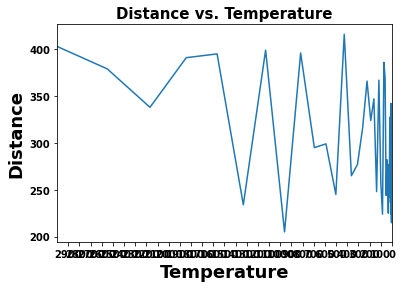

In [6]:
Temp = []
Min_Distance = []


for i in range(M):
    for j in range(N):
        # şehirleri değiştirmek için random integer üretme , örn. 3-5 çıktı o şehirlerin yerini değiştir
        Ran1 = np.random.randint(0,len(X0))
        Ran2 = np.random.randint(0,len(X0))
        while Ran1 == Ran2:                         # eğer random sayılar eşitse tekrar seçilir
            Ran2 = np.random.randint(0,len(X0))
        
        Xtemp = []
        A1 = X0[Ran1] # random sayıya denk gelen şehir
        A2 = X0[Ran2] 
        
        # X0= ["A","C","G","D","E","B","F"]
        
        # Yeni şehir sıralaması listesi- random sayılara denk gelen şehirlerin yerini değiştirir
        w = 0
        for i in X0:
            if X0[w]==A1:
                Xtemp=np.append(Xtemp,A2)
            elif X0[w]==A2:
                Xtemp=np.append(Xtemp,A1)
            else:
                Xtemp=np.append(Xtemp,X0[w])
            w = w+1
        
        Xtemp = list(Xtemp)
        
        
        
        Distances_X0 = [] # oluşturduğumuz ilk çözüm
        t = 0
        for i in range(len(X0)-1):
            X1_1 = Data1.loc[X0[t],X0[t+1]] # şehir ve ondan sonraki şehir arası
            X11 = Data1.loc[X0[-1],X0[0]] # son ve ilk şehir arası
            Distances_X0.append(X1_1) # listeye ekle
            t = t+1
        
        Distances_X0.append(X11) # sondan ilk şehre mesafeyi listeye ekle
        Len_X0 = sum(Distances_X0) # mesafeleri topla
        
        
        Distances_Xtemp = [] # potansiyel çözüm 
        t = 0
        for i in range(len(Xtemp)-1):
            X1_2 = Data1.loc[Xtemp[t],Xtemp[t+1]] 
            X11 = Data1.loc[Xtemp[-1],Xtemp[0]] 
            Distances_Xtemp.append(X1_2) 
            t = t+1
        
        Distances_Xtemp.append(X11) 
        Len_Xtemp = sum(Distances_Xtemp)
        
        
        rand_num = np.random.rand() # random sayı oluştur
        form_1 = 1/(np.exp((Len_Xtemp-Len_X0)/T0)) #yerel minden kurtulma
        
        if Len_Xtemp <= Len_X0: # Potansiyel çözümün daha iyiyse (daha az)
            X0 = Xtemp
        
        elif rand_num <= form_1: # random sayı formülden daha küçükse
            X0 = Xtemp
        
        else: # hiçbiri değilse aynı şekilde kal
            X0 = X0
            
    Temp = np.append(Temp, T0) # Bu değerler grafik oluştururken kullanmak için
    Min_Distance = np.append(Min_Distance,Len_Xtemp)
    
    T0 = Alpha*T0 # sıcaklığı düşürür
    
    
    
    
    

print
print
print("Final Çözümü: ", X0)
print("Final Çözümünün Minimum Mesafesi: ", Len_X0)


plt.plot(Temp,Min_Distance)
plt.title("Distance vs. Temperature",fontsize=15,fontweight='bold')
plt.xlabel("Temperature",fontsize=18,fontweight='bold')
plt.ylabel("Distance",fontsize=18,fontweight='bold')
plt.xlim(3000, 0)
plt.xticks(np.arange(min(Temp), max(Temp), 100),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()
